# Modelling

In [2]:
from google.colab import files
uploaded = files.upload()

Saving marketing_data.csv to marketing_data.csv


## reading the data

In [ ]:
# Load the dataset
file_path = 'marketing_data.csv'
data = pd.read_csv(file_path)

In [ ]:
from EDA import preprocess_marketing_data
data_encoded=preprocess_marketing_data(data)

# Machine learning models



## Defing Xtrain and Xtest

In [6]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## LogisticRegression and GradientBoostingClassifier

In [7]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score

# Initialize alternative models
models = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    results[name] = {
        "Accuracy": accuracy,
        "Classification Report": class_report,
        "ROC AUC": roc_auc
    }

# Convert results to DataFrames
# 1. Accuracy DataFrame
accuracy_df = pd.DataFrame({"Model": results.keys(),
                            "Accuracy": [res["Accuracy"] for res in results.values()]})

# 2. Classification Report DataFrame
class_reports = {model: pd.DataFrame(metrics["Classification Report"]).transpose()
                 for model, metrics in results.items()}

# 3. ROC AUC DataFrame
roc_auc_df = pd.DataFrame({"Model": [name for name in results.keys()],
                           "ROC AUC": [metrics["ROC AUC"] for metrics in results.values()]})

# Display results
print("Accuracy:")
print(accuracy_df)

print("\nClassification Reports:")
for model, report_df in class_reports.items():
    print(f"\n{model}:")
    print(report_df)

print("\nROC AUC:")
print(roc_auc_df)

Accuracy:
                 Model  Accuracy
0    Gradient Boosting  0.927022
1  Logistic Regression  0.927486

Classification Reports:

Gradient Boosting:
              precision    recall  f1-score      support
0              0.933278  0.991967  0.961728  7967.000000
1              0.576159  0.133436  0.216687   652.000000
accuracy       0.927022  0.927022  0.927022     0.927022
macro avg      0.754719  0.562701  0.589208  8619.000000
weighted avg   0.906263  0.927022  0.905368  8619.000000

Logistic Regression:
              precision    recall  f1-score      support
0              0.931781  0.994352  0.962050  7967.000000
1              0.615385  0.110429  0.187256   652.000000
accuracy       0.927486  0.927486  0.927486     0.927486
macro avg      0.773583  0.552391  0.574653  8619.000000
weighted avg   0.907846  0.927486  0.903439  8619.000000

ROC AUC:
                 Model   ROC AUC
0    Gradient Boosting  0.780977
1  Logistic Regression  0.758514


## Deep learning

### without over sampling

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load your preprocessed dataset
# Assuming `data_encoded` is your final dataset after preprocessing
# Ensure that 'y' is the target variable and all other columns are features
#data_encoded = pd.read_csv("your_preprocessed_dataset.csv")

# Define features and target
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    verbose=0)  # Set verbose=1 to see training progress

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Generate predictions for the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate precision and recall for class 0 (No)
precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)

# Calculate precision and recall for class 1 (Yes)
precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

# Print the results
print(f"Precision for class 0 (No): {precision_0:.4f}")
print(f"Recall for class 0 (No): {recall_0:.4f}")
print(f"Precision for class 1 (Yes): {precision_1:.4f}")
print(f"Recall for class 1 (Yes): {recall_1:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9267 - loss: 0.3374
Test Accuracy: 92.33%
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Precision for class 0 (No): 0.9328
Recall for class 0 (No): 0.9882
Precision for class 1 (Yes): 0.4749
Recall for class 1 (Yes): 0.1304

Classification Report:
              precision    recall  f1-score   support

          No       0.93      0.99      0.96      7967
         Yes       0.47      0.13      0.20       652

    accuracy                           0.92      8619
   macro avg       0.70      0.56      0.58      8619
weighted avg       0.90      0.92      0.90      8619



### with oversampling (Using different methods)


Applying method: SMOTE
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


799/799 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6753 - loss: 0.5951 - val_accuracy: 0.8962 - val_loss: 0.2781
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8817 - loss: 0.2924 - val_accuracy: 0.9193 - val_loss: 0.2259
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9128 - loss: 0.2282 - val_accuracy: 0.9210 - val_loss: 0.2083
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9215 - loss: 0.2055 - val_accuracy: 0.9286 - val_loss: 0.1923
Epoch 5/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9256 - loss: 0.1956 - val_accuracy: 0.9355 - val_loss: 0.1764
Epoch 6/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9293 - loss: 0.1843 - val_accuracy: 0.9350 - val_loss: 0.1779
Epoch 7/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9302 - loss: 0.1856 - val_accuracy: 0.9353 - val_loss: 0.1719
Epoch 8/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9330 - loss: 0.1784 - val_accuracy: 0.9368 - val_

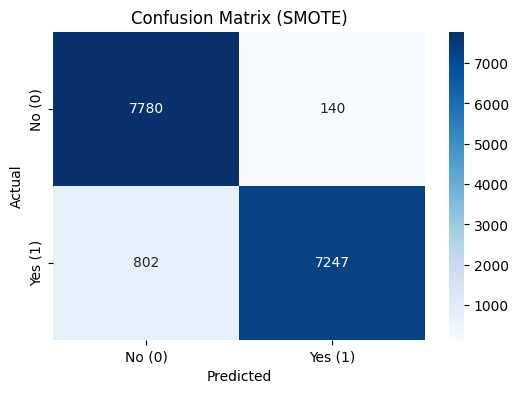


Applying method: ADASYN
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


801/801 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6558 - loss: 0.6623 - val_accuracy: 0.8818 - val_loss: 0.2957
Epoch 2/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8753 - loss: 0.3063 - val_accuracy: 0.9116 - val_loss: 0.2267
Epoch 3/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9074 - loss: 0.2397 - val_accuracy: 0.9272 - val_loss: 0.2008
Epoch 4/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9187 - loss: 0.2133 - val_accuracy: 0.9209 - val_loss: 0.2033
Epoch 5/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9244 - loss: 0.1988 - val_accuracy: 0.9280 - val_loss: 0.1856
Epoch 6/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9276 - loss: 0.1880 - val_accuracy: 0.9305 - val_loss: 0.1824
Epoch 7/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9279 - loss: 0.1860 - val_accuracy: 0.9316 - val_loss: 0.1787
Epoch 8/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9296 - loss: 0.1864 - val_accuracy: 0.9314 - val_

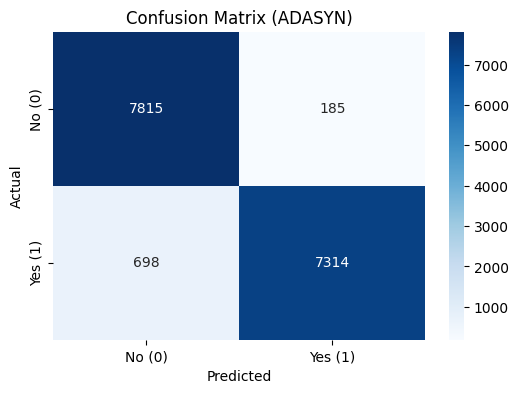


Applying method: Hybrid (SMOTE + Tomek)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


799/799 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6657 - loss: 0.6432 - val_accuracy: 0.8969 - val_loss: 0.2894
Epoch 2/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8795 - loss: 0.3019 - val_accuracy: 0.9183 - val_loss: 0.2169
Epoch 3/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9094 - loss: 0.2402 - val_accuracy: 0.9246 - val_loss: 0.2008
Epoch 4/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9213 - loss: 0.2125 - val_accuracy: 0.9325 - val_loss: 0.1826
Epoch 5/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9210 - loss: 0.2040 - val_accuracy: 0.9334 - val_loss: 0.1763
Epoch 6/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9249 - loss: 0.1949 - val_accuracy: 0.9331 - val_loss: 0.1754
Epoch 7/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9279 - loss: 0.1869 - val_accuracy: 0.9343 - val_loss: 0.1742
Epoch 8/50
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9320 - loss: 0.1826 - val_accuracy: 0.9358 - val_

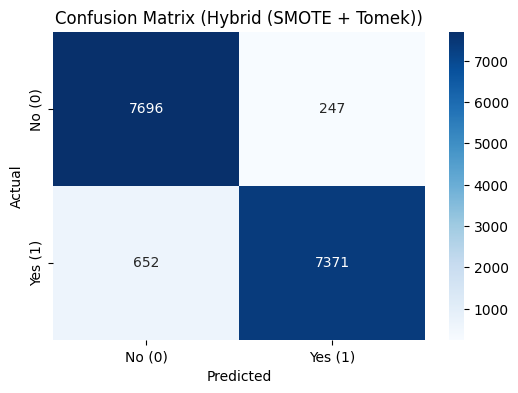


Applying method: Class Weight Adjustment
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


431/431 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5864 - loss: 0.7554 - val_accuracy: 0.6521 - val_loss: 0.6392
Epoch 2/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7262 - loss: 0.5931 - val_accuracy: 0.7460 - val_loss: 0.5912
Epoch 3/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7645 - loss: 0.5699 - val_accuracy: 0.8267 - val_loss: 0.5150
Epoch 4/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7674 - loss: 0.5687 - val_accuracy: 0.8500 - val_loss: 0.4666
Epoch 5/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7855 - loss: 0.5626 - val_accuracy: 0.8135 - val_loss: 0.5169
Epoch 6/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7843 - loss: 0.5453 - val_accuracy: 0.8474 - val_loss: 0.4350
Epoch 7/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7909 - loss: 0.5361 - val_accuracy: 0.7717 - val_loss: 0.5573
Epoch 8/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7862 - loss: 0.5313 - val_accuracy: 0.8496 - val_

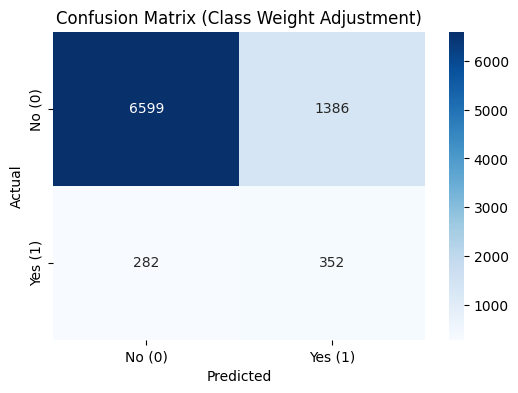


Final Comparison:
                    Method  Test Accuracy  Precision (No)  Recall (No)  \
0                    SMOTE      94.101071        0.906549     0.982323   
1                   ADASYN      94.485384        0.918008     0.976875   
2   Hybrid (SMOTE + Tomek)      94.369286        0.921897     0.968903   
3  Class Weight Adjustment      80.647409        0.959018     0.826425   

   Precision (Yes)  Recall (Yes)  
0         0.981048      0.900360  
1         0.975330      0.912881  
2         0.967577      0.918734  
3         0.202532      0.555205  


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare the data
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

# Define methods in a dictionary
methods = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "Hybrid (SMOTE + Tomek)": SMOTETomek(random_state=42),
    "Class Weight Adjustment": None  # No resampling, adjust class weights instead
}

# Results storage
results = {}

for method_name, method in methods.items():
    print(f"\nApplying method: {method_name}")

    if method_name == "Class Weight Adjustment":
        # Skip resampling, use original data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
        class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
        class_weights = dict(enumerate(class_weights))
    else:
        # Apply resampling
        X_resampled, y_resampled = method.fit_resample(X, y)
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
        class_weights = None  # Not used for these methods

    # Define and compile the model
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train,
                        validation_split=0.2,
                        epochs=50,
                        batch_size=64,
                        class_weight=class_weights)

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy ({method_name}): {test_accuracy * 100:.2f}%")

    # Generate predictions and calculate precision, recall, and confusion matrix
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    report = classification_report(y_test, y_pred, target_names=['No (0)', 'Yes (1)'], output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Extract metrics for both classes
    precision_no = report['No (0)']['precision']
    recall_no = report['No (0)']['recall']
    precision_yes = report['Yes (1)']['precision']
    recall_yes = report['Yes (1)']['recall']

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No (0)', 'Yes (1)']))

    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No (0)', 'Yes (1)'], yticklabels=['No (0)', 'Yes (1)'])
    plt.title(f"Confusion Matrix ({method_name})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Store results
    results[method_name] = {
        "test_accuracy": test_accuracy,
        "test_loss": test_loss,
        "precision_no": precision_no,
        "recall_no": recall_no,
        "precision_yes": precision_yes,
        "recall_yes": recall_yes,
        "confusion_matrix": conf_matrix
    }

# Print final comparison
import pandas as pd

results_df = pd.DataFrame([
    {
        "Method": method,
        "Test Accuracy": result['test_accuracy'] * 100,
        "Precision (No)": result['precision_no'],
        "Recall (No)": result['recall_no'],
        "Precision (Yes)": result['precision_yes'],
        "Recall (Yes)": result['recall_yes']
    }
    for method, result in results.items()
])

print("\nFinal Comparison:")
print(results_df)
